# MasterCamp_TD_Project

### Importation des librairies

In [1]:
%reset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns

### Importation des données

In [2]:
# Chargement des données
df = 'data/valeursfoncieres-2023.txt'

# Lecture du fichier par échantillons de 10 000 lignes
df_chunks = pd.read_csv(df, sep='|', chunksize=10000, decimal=',')

# Concaténation des échantillons
df = pd.concat(df_chunks)

# On garde les colonnes qui nous intéressent : 

# show les noms des colonnes :
df.columns
"""Index(['Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local', 'Identifiant local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')"""

# On garde les colonnes qui nous intéressent : "No disposition", "Date mutation", "Nature mutation", "Valeur fonciere", "Code departement", "Code commune", "Prefixe de section", "Section", "No plan", "Code type local", "Surface reelle bati", "Surface terrain"
df = df[["No disposition", "Date mutation", "Nature mutation", "Valeur fonciere", "Code departement", "Code commune", "Prefixe de section", "Section", "No plan", "Code type local", "Surface reelle bati", "Surface terrain", "Nombre pieces principales", "Surface Carrez du 1er lot", "Surface Carrez du 2eme lot", "Surface Carrez du 3eme lot", "Surface Carrez du 4eme lot", "Surface Carrez du 5eme lot"]]

# print les 10 premières lignes
df.head(10)

,No disposition,Date mutation,Nature mutation,Valeur fonciere,Code departement,Code commune,Prefixe de section,Section,No plan,Code type local,Surface reelle bati,Surface terrain,Nombre pieces principales,Surface Carrez du 1er lot,Surface Carrez du 2eme lot,Surface Carrez du 3eme lot,Surface Carrez du 4eme lot,Surface Carrez du 5eme lot
0,1,05/01/2023,Vente,1070000.0,1,354,NaN,BD,334,3.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,1,05/01/2023,Vente,1070000.0,1,354,NaN,BD,336,3.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,1,05/01/2023,Vente,1070000.0,1,354,NaN,BD,336,2.0,233.0,NaN,8.0,NaN,NaN,NaN,NaN,NaN
3,1,03/01/2023,Vente,152200.0,1,404,NaN,D,2317,1.0,64.0,988.0,3.0,NaN,NaN,NaN,NaN,NaN
4,1,05/01/2023,Vente,269000.0,1,361,NaN,B,2405,1.0,73.0,835.0,3.0,NaN,NaN,NaN,NaN,NaN
5,1,05/01/2023,Vente,269000.0,1,361,NaN,B,2405,3.0,0.0,835.0,0.0,NaN,NaN,NaN,NaN,NaN
6,1,05/01/2023,Vente,269000.0,1,361,NaN,B,2405,3.0,0.0,835.0,0.0,NaN,NaN,NaN,NaN,NaN
7,1,03/01/2023,Vente,770000.0,1,281,NaN,AD,41,1.0,136.0,921.0,7.0,NaN,NaN,NaN,NaN,NaN
8,1,06/01/2023,Vente,6820.0,1,446,NaN,ZL,19,NaN,NaN,17050.0,NaN,NaN,NaN,NaN,NaN,NaN
9,2,06/01/2023,Echange,10040.0,1,4,NaN,AV,900,NaN,NaN,124.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# print les lignes du 75
df[df['Code departement'] == 75].head(10)

,No disposition,Date mutation,Nature mutation,Valeur fonciere,Code departement,Code commune,Prefixe de section,Section,No plan,Code type local,Surface reelle bati,Surface terrain,Nombre pieces principales,Surface Carrez du 1er lot,Surface Carrez du 2eme lot,Surface Carrez du 3eme lot,Surface Carrez du 4eme lot,Surface Carrez du 5eme lot
3646585,1,03/01/2023,Vente,1825000.00,75,101,NaN,AP,50,4.0,165.0,NaN,0.0,95.21,NaN,NaN,NaN,NaN
3646586,1,05/01/2023,Vente,567000.00,75,110,NaN,AV,75,4.0,52.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3646587,1,04/01/2023,Vente,140000.00,75,117,NaN,BG,53,2.0,18.0,NaN,1.0,18.75,NaN,NaN,NaN,NaN
3646588,1,05/01/2023,Vente,400000.00,75,109,NaN,BD,36,2.0,43.0,NaN,1.0,43.80,NaN,NaN,NaN,NaN
3646589,1,04/01/2023,Vente,141343.12,75,118,NaN,AK,14,3.0,0.0,NaN,0.0,11.40,NaN,NaN,NaN,NaN
3646590,1,03/01/2023,Vente,295000.00,75,117,NaN,DG,40,2.0,28.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN
3646591,1,03/01/2023,Vente,300400.00,75,118,NaN,BV,98,3.0,0.0,NaN,0.0,36.11,NaN,NaN,NaN,NaN
3646592,1,03/01/2023,Vente,300400.00,75,118,NaN,BV,98,2.0,36.0,NaN,2.0,36.11,NaN,NaN,NaN,NaN
3646593,1,02/01/2023,Vente,17300.00,75,119,NaN,CW,14,3.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN
3646594,1,03/01/2023,Vente,1700.00,75,110,NaN,BW,56,3.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [4]:
# Conversion des autres colonnes en types numériques, avec gestion des NaN
cols_to_convert = ['Surface reelle bati', 'Surface terrain']

for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# On remplace les NaN par 0
df.fillna(0, inplace=True)

df.dtypes

No disposition                  int64
Date mutation                  object
Nature mutation                object
Valeur fonciere               float64
Code departement               object
Code commune                    int64
Prefixe de section            float64
Section                        object
No plan                         int64
Code type local               float64
Surface reelle bati           float64
Surface terrain               float64
Nombre pieces principales     float64
Surface Carrez du 1er lot     float64
Surface Carrez du 2eme lot    float64
Surface Carrez du 3eme lot    float64
Surface Carrez du 4eme lot    float64
Surface Carrez du 5eme lot    float64
dtype: object

In [5]:
# On supprime les lignes où la surface totale est nulle
df = df[df['Surface reelle bati'] > 0]

# Prix au m2
df['Prix m2'] = df['Valeur fonciere'] / df['Surface reelle bati']

# virer les lignes avec code type local = 0
df = df[df['Code type local'] != 0]

df.head(10)

,No disposition,Date mutation,Nature mutation,Valeur fonciere,Code departement,Code commune,Prefixe de section,Section,No plan,Code type local,Surface reelle bati,Surface terrain,Nombre pieces principales,Surface Carrez du 1er lot,Surface Carrez du 2eme lot,Surface Carrez du 3eme lot,Surface Carrez du 4eme lot,Surface Carrez du 5eme lot,Prix m2
2,1,05/01/2023,Vente,1070000.0,1,354,0.0,BD,336,2.0,233.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,4592.274678
3,1,03/01/2023,Vente,152200.0,1,404,0.0,D,2317,1.0,64.0,988.0,3.0,0.0,0.0,0.0,0.0,0.0,2378.125000
4,1,05/01/2023,Vente,269000.0,1,361,0.0,B,2405,1.0,73.0,835.0,3.0,0.0,0.0,0.0,0.0,0.0,3684.931507
7,1,03/01/2023,Vente,770000.0,1,281,0.0,AD,41,1.0,136.0,921.0,7.0,0.0,0.0,0.0,0.0,0.0,5661.764706
14,3,06/01/2023,Vente,85520.0,1,24,0.0,AI,127,1.0,160.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,534.500000
16,1,04/01/2023,Vente,335000.0,1,152,0.0,AC,166,1.0,106.0,1500.0,6.0,0.0,0.0,0.0,0.0,0.0,3160.377358
17,1,04/01/2023,Vente,335000.0,1,152,0.0,AC,166,1.0,106.0,778.0,6.0,0.0,0.0,0.0,0.0,0.0,3160.377358
20,1,04/01/2023,Vente,209000.0,1,53,0.0,AC,528,2.0,68.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,3073.529412
22,1,03/01/2023,Vente,325000.0,1,348,0.0,YB,160,1.0,70.0,403.0,4.0,0.0,0.0,0.0,0.0,0.0,4642.857143
29,1,04/01/2023,Vente,430000.0,1,314,0.0,D,2776,2.0,51.0,89.0,2.0,0.0,0.0,0.0,0.0,0.0,8431.372549


In [6]:
# fusionner les lignes avec la même date, même valeur fonciere, meme code departement, meme code commune, meme prefixe de section, meme section, meme no plan,meme surface reelle bati, meme surface terrain, meme surface totale, meme prix m2
# on garde le code type local le plus petit, faire somme des surfaces reelles bati et terrain dans une colonne (surface combined):
df = df.groupby(['Date mutation', 'Valeur fonciere', 'Code departement', 'Code commune', 'Prefixe de section', 'Section', 'No plan', 'Surface terrain', 'Prix m2']).agg({
    'Nombre pieces principales': 'sum',
    'Code type local': 'min',
    'Surface reelle bati': 'sum',
}).reset_index()

In [7]:
# Médiane surface totale par département
df.groupby('Code departement')['Prix m2'].median().sort_values(ascending=False)

Code departement
75    10454.545455
92     7150.000000
94     5304.347826
6      5000.000000
74     4536.640492
          ...     
55     1145.833333
36     1116.279070
58     1114.864865
52     1062.114198
23      930.232558
Name: Prix m2, Length: 99, dtype: float64

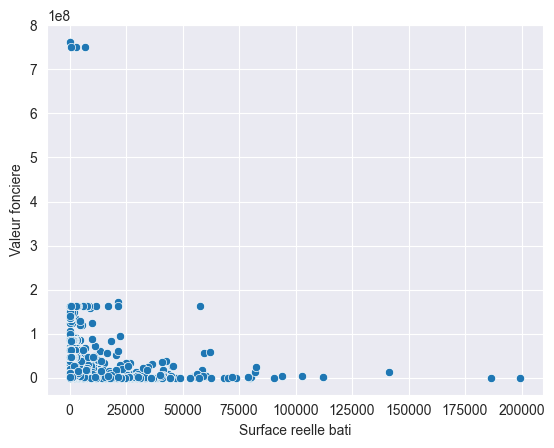

In [8]:
# Le clustering et l'algo de KMeans vont nous aider à identifier des groupes de ou des segments naturels au sein de notre dataset de biens immobiliers
# Ces groupes peuvent révéler des tendances et des patterns qui ne sont pas immédiatement visibles
# Objectifs :
# segments de prix (identifier des zones ou des types de biens immobiliers qui ont des prix similaires), 
# segments de surface (identifier des zones ou des types de biens immobiliers qui ont des surfaces similaires), 
# analyser les tendances géographiques (comprendre les dynamiques locales du marché immobilier)
# analyser les tendances temporelles (comprendre comment les prix et les surfaces évoluent au fil du temps)

# On va commencer par un clustering simple basé sur la surface totale et le prix au m2
# On va ensuite affiner le clustering en ajoutant d'autres variables

# On commence par afficher les données
sns.scatterplot(data=df, x='Surface reelle bati', y='Valeur fonciere')
plt.show()

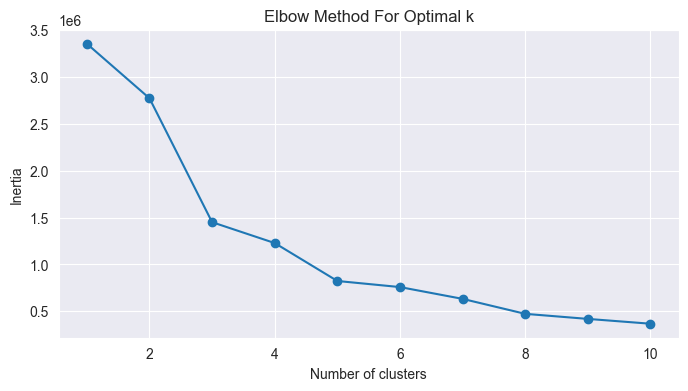

In [9]:
# On standardise les données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Valeur fonciere', 'Surface reelle bati', 'Prix m2']])


# Décider du n-cluster avec la méthode Elbow
wcss = []
for n in range(1, 11):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)

# Affichage du graphique Elbow
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [10]:
from kneed import KneeLocator
kl = KneeLocator(range(1, 11), wcss, curve="convex", direction="decreasing")
kl.elbow

5

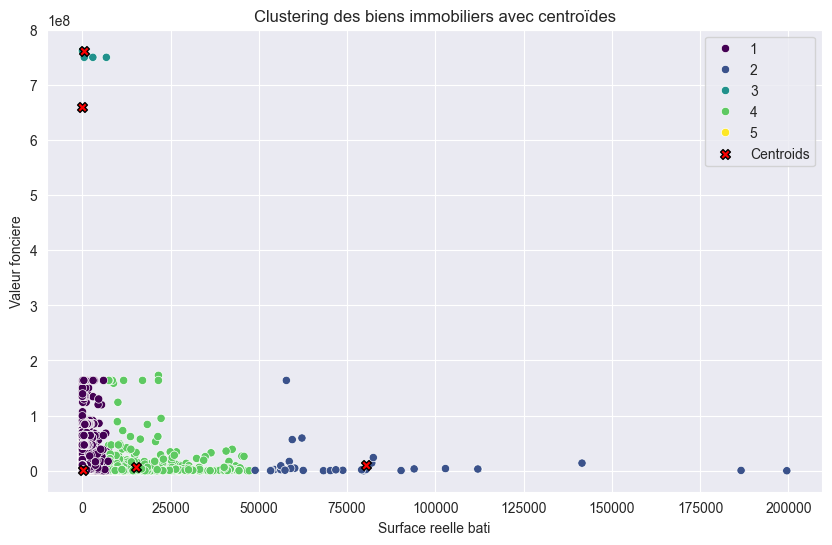

In [11]:
# Nombre optimal de clusters
optimal_clusters = 5

# Normalisation des données
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Surface reelle bati', 'Valeur fonciere', 'Prix m2']])

# Apprentissage K-Means
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(df_scaled)

# Ajout des clusters aux données d'origine
df['Cluster'] = clusters + 1

# Visualisation des clusters avec les centroïdes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Surface reelle bati', y='Valeur fonciere', hue='Cluster', palette='viridis')

# Ajouter les centroïdes
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=50, c='red', marker='X', edgecolors='black', label='Centroids')
plt.legend(loc='upper right')
plt.title('Clustering des biens immobiliers avec centroïdes')
plt.xlabel('Surface reelle bati')
plt.ylabel('Valeur fonciere')
plt.show()

### Visualisation la distribution avec une échelle logarithmique

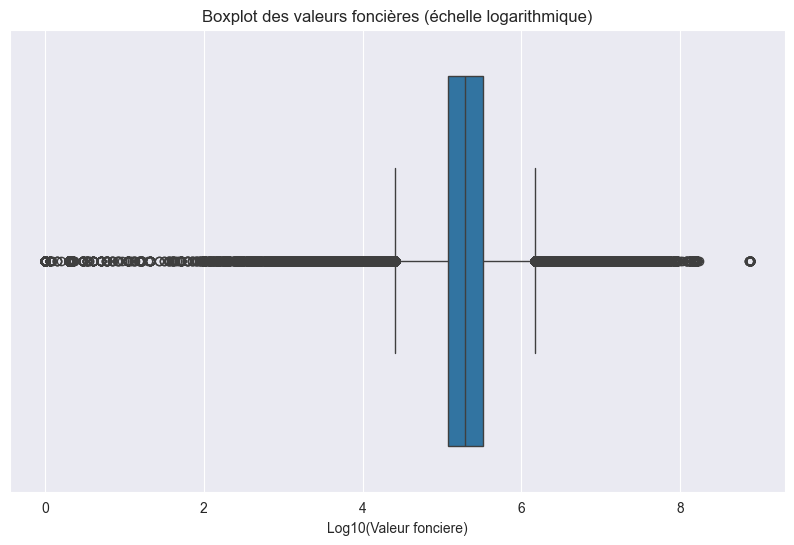

In [12]:
# Visualisation avec échelle logarithmique

plt.figure(figsize=(10, 6))
sns.boxplot(x=np.log10(df['Valeur fonciere'] + 1))
plt.title('Boxplot des valeurs foncières (échelle logarithmique)')
plt.xlabel('Log10(Valeur fonciere)')
plt.show()

### Analyse des clusters

Distribution des clusters après échantillonnage :
Cluster
3    904
1    592
2    326
5    151
Name: count, dtype: int64


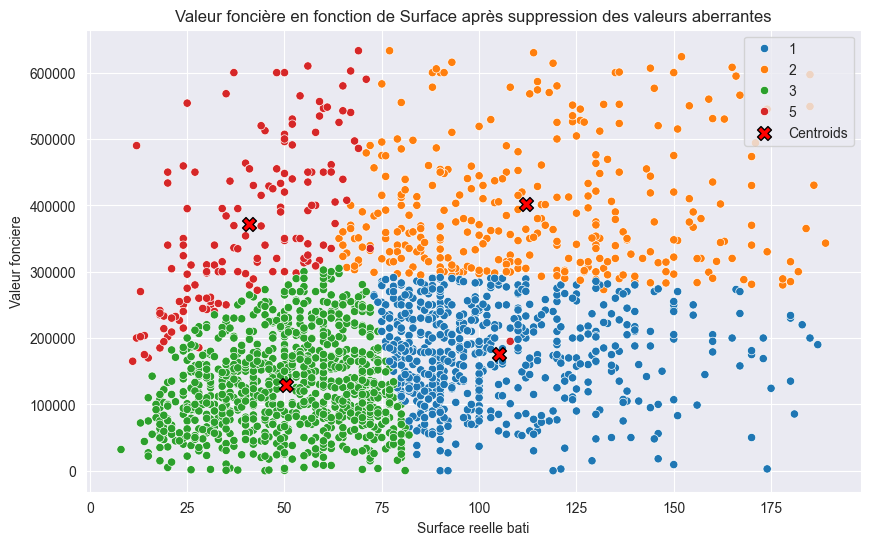

In [43]:
# Calcul des quantiles et de l'InterQuartile Range (IQR)
Q1 = df[['Valeur fonciere', 'Surface reelle bati']].quantile(0.25)  # récupérer les valeurs en dessous desquelles se trouvent 25% des données
Q3 = df[['Valeur fonciere', 'Surface reelle bati']].quantile(0.75)  # récupérer les valeurs en dessous desquelles se trouvent 75% des données
IQR = Q3 - Q1  # la différence entre les deux quartiles représente la dispersion des données des 50% des données centrales

# Création du masque pour booléen pour filtrer les valeurs aberrantes (outliers)
mask_non_outliers = (
        (df['Valeur fonciere'] >= (Q1['Valeur fonciere'] - 1.5 * IQR['Valeur fonciere'])) &
        (df['Valeur fonciere'] <= (Q3['Valeur fonciere'] + 1.5 * IQR['Valeur fonciere'])) &
        (df['Surface reelle bati'] >= (Q1['Surface reelle bati'] - 1.5 * IQR['Surface reelle bati'])) &
        (df['Surface reelle bati'] <= (Q3['Surface reelle bati'] + 1.5 * IQR['Surface reelle bati']))
)

# Application du masque pour filtrer les valeurs non aberrantes
df_filtered = df[mask_non_outliers].copy()

# Normalisation des données filtrées
scaler = StandardScaler()
df_scaled_filtered = scaler.fit_transform(df_filtered[['Valeur fonciere', 'Surface reelle bati', 'Prix m2']])

# Apprentissage K-Means avec le nombre de clusters optimal (5) sur les données filtrées
optimal_clusters = 5
kmeans_filtered = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters_filtered = kmeans_filtered.fit_predict(df_scaled_filtered)

# Ajout des clusters aux données filtrées, ajustement pour commencer à 1
df_filtered['Cluster'] = clusters_filtered + 1

# Réduction de la densité des points pour une meilleure visualisation (prendre 0.2% des données)
df_sampled = df_filtered.sample(frac=0.002, random_state=42)

# Vérifiez la distribution des clusters après échantillonnage
print("Distribution des clusters après échantillonnage :")
print(df_sampled['Cluster'].value_counts())

# Créer une palette dynamique
unique_clusters = df_sampled['Cluster'].unique()
palette = sns.color_palette("tab10", len(unique_clusters))

# Visualisation des clusters sur les données filtrées (Valeur foncière en fonction de Surface)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_sampled, x='Surface reelle bati', y='Valeur fonciere', hue='Cluster', palette=palette)
plt.title('Valeur foncière en fonction de Surface après suppression des valeurs aberrantes')
plt.xlabel('Surface reelle bati')
plt.ylabel('Valeur fonciere')

# Ajouter les centroïdes uniquement pour les clusters présents dans l'échantillon
centroids = scaler.inverse_transform(kmeans_filtered.cluster_centers_)
for i, cluster in enumerate(unique_clusters):
    plt.scatter(centroids[cluster-1, 1], centroids[cluster-1, 0], s=100, c='red', marker='X', edgecolors='black')

plt.scatter([], [], s=100, c='red', marker='X', edgecolors='black', label='Centroids')
plt.legend(loc='upper right')  # afficher la légende en haut à droite
plt.show()


C:\Users\Kevin\AppData\Local\Temp\ipykernel_4812\367319291.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_dept_agg, x='Cluster', y='Valeur fonciere', palette='viridis')


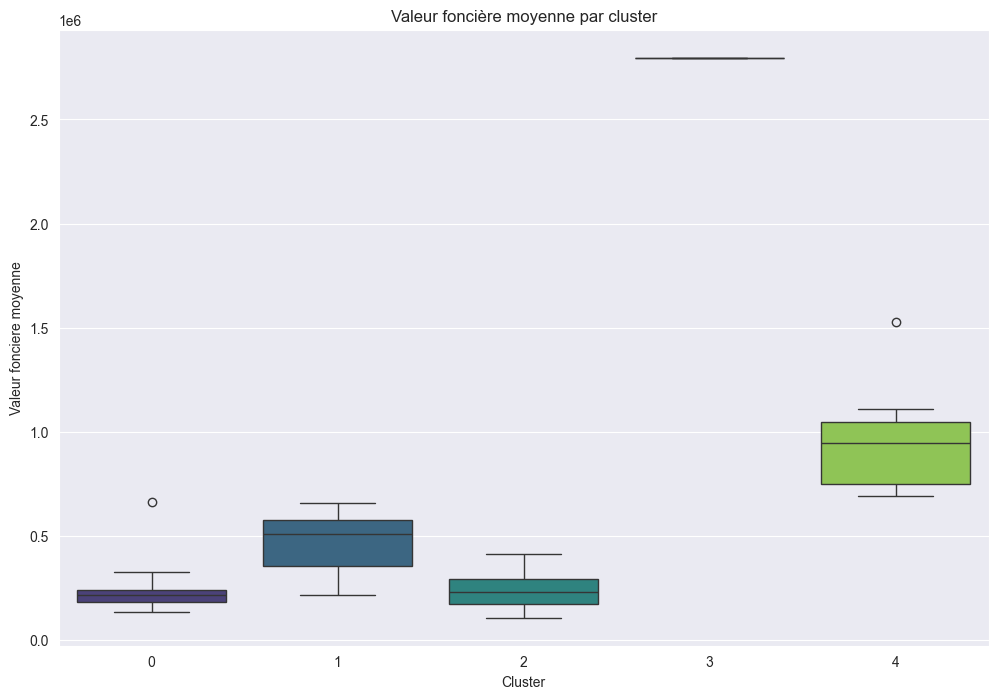

C:\Users\Kevin\AppData\Local\Temp\ipykernel_4812\367319291.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_dept_agg, x='Cluster', y='Surface reelle bati', palette='viridis')


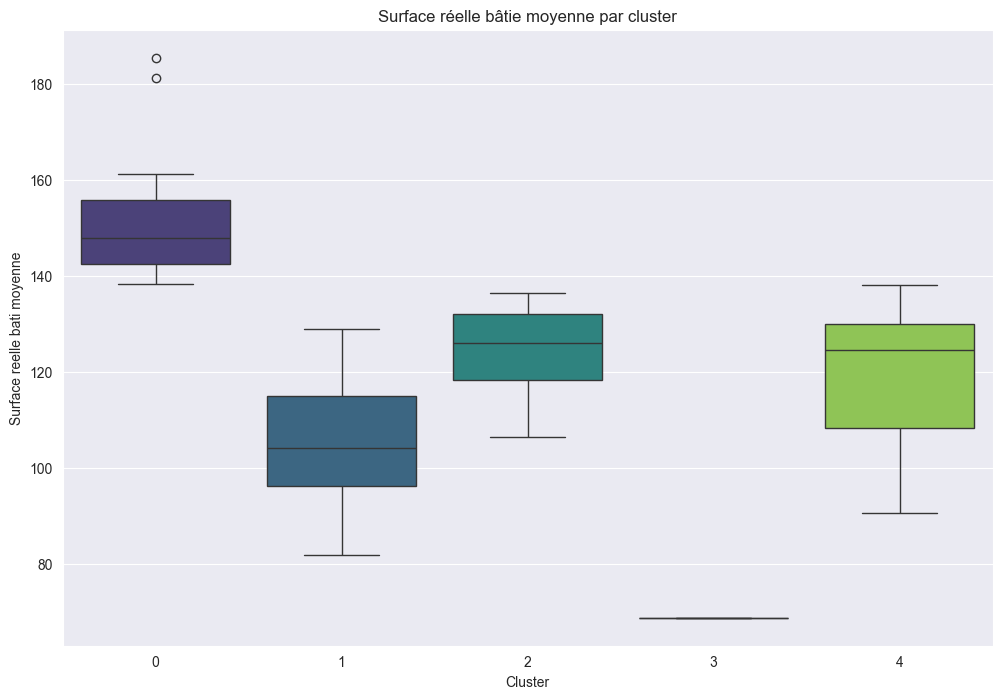

C:\Users\Kevin\AppData\Local\Temp\ipykernel_4812\367319291.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_dept_agg, x='Cluster', y='Prix m2', palette='viridis')


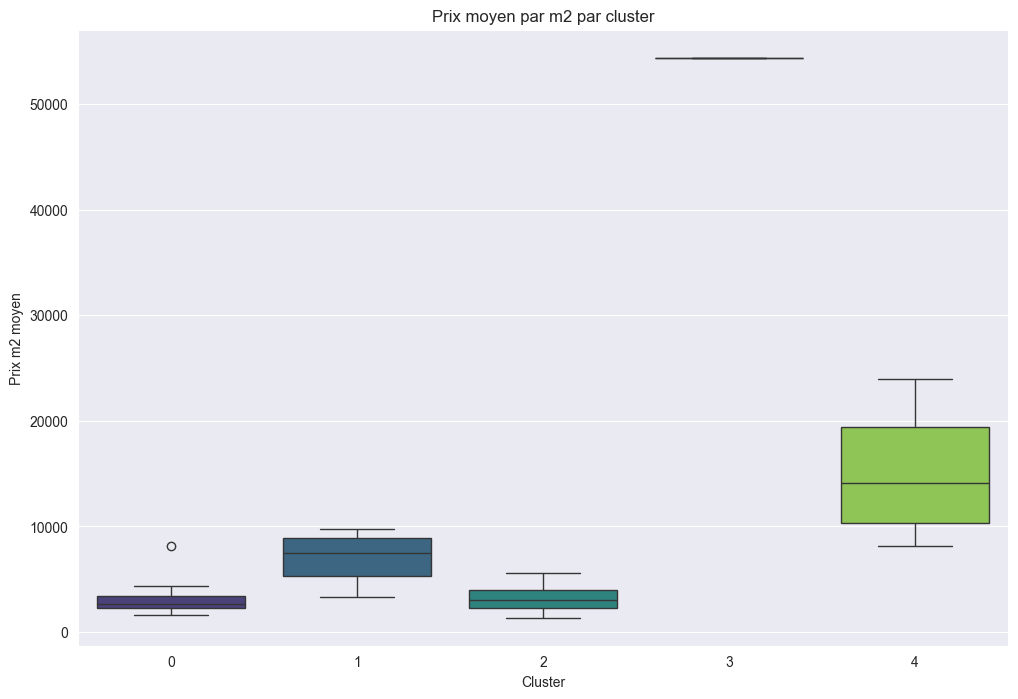

In [44]:
# Assurer que 'Code departement' est une chaîne de caractères
df['Code departement'] = df['Code departement'].astype(str)

# Calcul des statistiques agrégées par département
df_dept_agg = df.groupby('Code departement').agg({
    'Valeur fonciere': 'mean',
    'Surface reelle bati': 'mean',
    'Prix m2': 'mean'
}).reset_index()

# Standardisation des données agrégées
scaler = StandardScaler()
df_dept_agg_scaled = scaler.fit_transform(df_dept_agg[['Valeur fonciere', 'Surface reelle bati', 'Prix m2']])

# Appliquer le clustering
kmeans_dept = KMeans(n_clusters=5, random_state=42).fit(df_dept_agg_scaled)
df_dept_agg['Cluster'] = kmeans_dept.labels_


plt.figure(figsize=(12, 8))
sns.barplot(data=df_dept_agg, x='Code departement', y='Valeur fonciere', hue='Cluster', palette='viridis')
plt.title('Clusters des départements selon la valeur foncière moyenne')
plt.xlabel('Code departement')
plt.ylabel('Valeur fonciere moyenne')
plt.xticks(rotation=90)
plt.show()
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_dept_agg, x='Cluster', y='Valeur fonciere', palette='viridis')
plt.title('Valeur foncière moyenne par cluster')
plt.xlabel('Cluster')
plt.ylabel('Valeur fonciere moyenne')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_dept_agg, x='Cluster', y='Surface reelle bati', palette='viridis')
plt.title('Surface réelle bâtie moyenne par cluster')
plt.xlabel('Cluster')
plt.ylabel('Surface reelle bati moyenne')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(data=df_dept_agg, x='Cluster', y='Prix m2', palette='viridis')
plt.title('Prix moyen par m2 par cluster')
plt.xlabel('Cluster')
plt.ylabel('Prix m2 moyen')
plt.show()
